In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import CategoricalNB

In [326]:
#Reading Data

dataPath='adult.csv'
col_names=['age', 'workclass', 'fnlwgt', 'education', 'edunum', 'mar', 'occupation'
           , 'rel', 'race', 'sex', 'capgain', 'caploss', 'hours per week', 'nat', '>50K']
dat=pd.read_csv(dataPath,names=col_names)


In [327]:
#Cleaning Data

dat['>50K'] = dat['>50K'].apply(lambda x: 0 if x==" <=50K" else 1)
dat.drop(['fnlwgt', 'capgain','caploss'], axis=1,inplace=True)

In [328]:
#Display Data

dat

,age,workclass,education,edunum,mar,occupation,rel,race,sex,hours per week,nat,>50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0


In [329]:
dat.describe()

,age,edunum,hours per week,>50K
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,0.240810
std,13.640433,2.572720,12.347429,0.427581
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


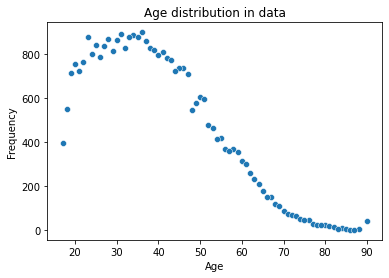

In [330]:
age_counts=dat['age'].value_counts().rename_axis('age').reset_index(name='counts')
sns.scatterplot(data=age_counts, x="age", y="counts")
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age distribution in data')
plt.show()

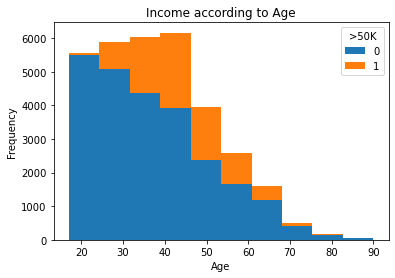

In [331]:
dat.pivot(columns='>50K').age.plot(kind = 'hist', stacked=True)
plt.xlabel('Age')
plt.title('Income according to Age')
plt.show()

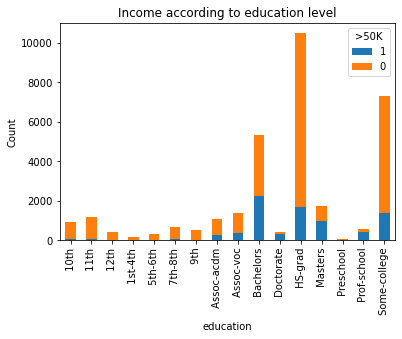

In [332]:
df = dat.groupby(['education', '>50K'])['education'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Income according to education level')
plt.show()

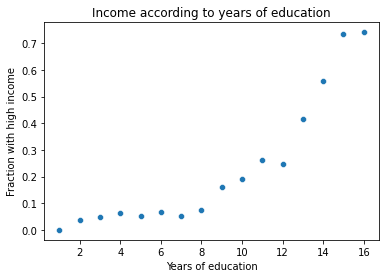

In [333]:
df = dat.groupby('edunum')['>50K'].mean().reset_index()
sns.scatterplot(data=df, x="edunum", y=">50K")
plt.ylabel('Fraction with high income')
plt.xlabel('Years of education')
plt.title('Income according to years of education')
plt.show()

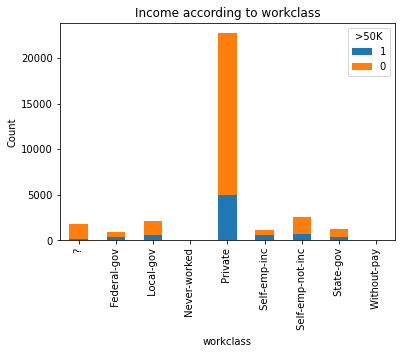

In [334]:
df = dat.groupby(['workclass', '>50K'])['workclass'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Income according to workclass')
plt.show()

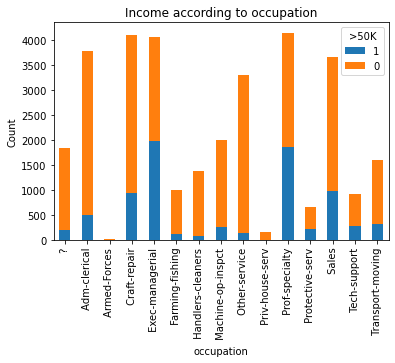

In [335]:
df = dat.groupby(['occupation', '>50K'])['occupation'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Income according to occupation')
plt.show()

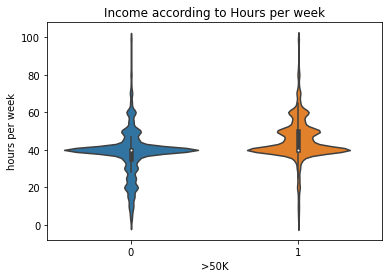

In [336]:
sns.violinplot(data = dat, x = '>50K', y = 'hours per week')
plt.title('Income according to Hours per week')
plt.show()

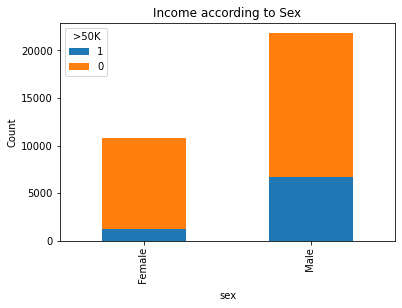

In [337]:
df = dat.groupby(['sex', '>50K'])['sex'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Income according to Sex')
plt.show()

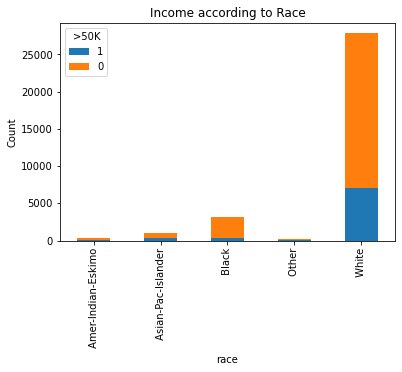

In [338]:
df = dat.groupby(['race', '>50K'])['race'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.title('Income according to Race')
plt.show()

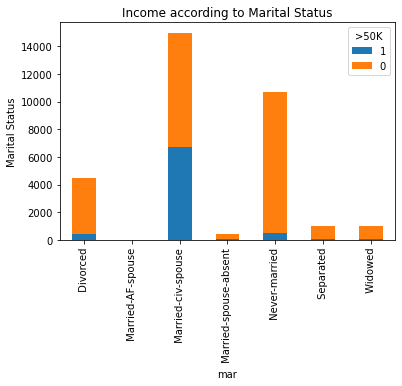

In [339]:
df = dat.groupby(['mar', '>50K'])['mar'].count().unstack('>50K').fillna(0)
df[[1,0]].plot(kind='bar', stacked=True)
plt.ylabel('Count')
plt.ylabel('Marital Status')
plt.title('Income according to Marital Status')
plt.show()

In [340]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

#choosing input features and splitting data
cont_cols=['age', 'edunum', 'hours per week']
target=">50K"
target_arr=[">50K"]
cat_cols=['occupation', 'sex', 'mar']

df_train, df_test = train_test_split(dat, test_size=0.1, random_state=42)
df_final = df_train[cat_cols+cont_cols+target_arr]

In [341]:
#Using Mixed Naive Bayes
ordi = OrdinalEncoder()

#gaussian
gc = GaussianNB()
cont_classifier = gc.fit(df_final[cont_cols],df_final[target])

#categorical (with ordinal encoding)
catnb = CategoricalNB()

out_df = pd.DataFrame(data=ordi.fit_transform(df_final[cat_cols]),columns=cat_cols)
mod = catnb.fit(out_df,df_final[target])

#encoding test data
test_in = df_test[cat_cols+cont_cols]
test_out_df = ordi.fit_transform(test_in[cat_cols])

#jointlog - sum of log probability (same as multiplying posteriors)

log_prior = mod.class_log_prior_
jointlogs = list()
jointlogs.append(cont_classifier._joint_log_likelihood(test_in[cont_cols]))
jointlogs.append(mod._joint_log_likelihood(np.array(test_out_df.astype(int))))

jointlogs = np.hstack([jointlogs])

#subtracting prior to get likelihood
jointlogs = jointlogs - log_prior
jointlog = jointlogs.sum(axis=0) + log_prior

#Standardising
exlog = np.exp(jointlog)
denom = np.sum(exlog, axis = 1, keepdims = True) 
result = exlog/denom

#Output calculation
y_pred = np.argmax(result,axis=1)

#Accuracy
print("Accuracy:")
(y_pred==df_test[target]).mean()

Accuracy:


0.8329751304881793

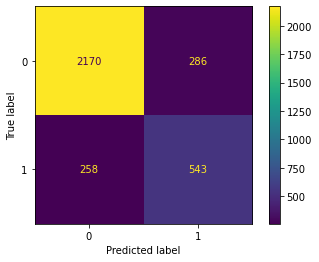

In [342]:
#confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf=confusion_matrix(df_test[target], y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf)
disp.plot()
plt.show()

In [343]:
#Print F1 score
from sklearn.metrics import f1_score
print('F1 score:')
f1_score(df_test[target], y_pred)

F1 score:


0.6662576687116565